In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air=pd.read_csv('AirQuality.csv', sep=';')
heart=pd.read_csv('heart.csv')

In [3]:
merged=pd.merge(air, heart, left_index=True, right_index=True)
merged

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,...,0,1,168,0,1.0,2,2,3,0,1.0
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,...,1,0,155,1,3.1,0,0,3,0,2.0
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,...,0,1,125,1,2.6,0,0,3,0,3.0
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,...,0,1,161,0,0.0,2,1,3,0,5.0
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,...,1,1,106,0,1.9,1,3,2,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,22/04/2004,06.00.00,-200,977.0,-200.0,"5,7",800.0,-200.0,990.0,-200.0,...,0,1,164,1,0.0,2,0,2,1,NaN
1021,22/04/2004,07.00.00,-200,1234.0,-200.0,"13,8",1109.0,-200.0,767.0,-200.0,...,0,0,141,1,2.8,1,1,3,0,NaN
1022,22/04/2004,08.00.00,-200,1403.0,-200.0,"21,6",1340.0,-200.0,623.0,-200.0,...,0,0,118,1,1.0,1,1,2,0,NaN
1023,22/04/2004,09.00.00,-200,1538.0,-200.0,"26,1",1458.0,-200.0,593.0,-200.0,...,0,0,159,0,0.0,2,0,2,1,NaN


In [4]:
# ERROR CORRECTING: 
from scipy import stats

zscore=stats.zscore(merged['trestbps'])
merged_no_outlier=merged[(zscore<3)]
heart=heart.drop(['patient_id'], axis=1)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# DATA TRANSFORMATION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

x=heart.iloc[:, :-1]
y=heart['target']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=RandomForestRegressor()
model.fit(x_train_scaled, y_train)

accuracytrain=model.score(x_train_scaled, y_train)
print(accuracytrain)
accuracytest=model.score(x_test_scaled, y_test)
print(accuracytest)
accuracytrainsss=model.score(x_train, y_train)
print(accuracytrainsss)
accuracytestsss=model.score(x_test, y_test)
print(accuracytestsss)

0.9939636874668762
0.9263826384922901
-0.0543717241009698
-0.03822568056348774


/home/ak-linux-computer/.local/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/home/ak-linux-computer/.local/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<AxesSubplot: >

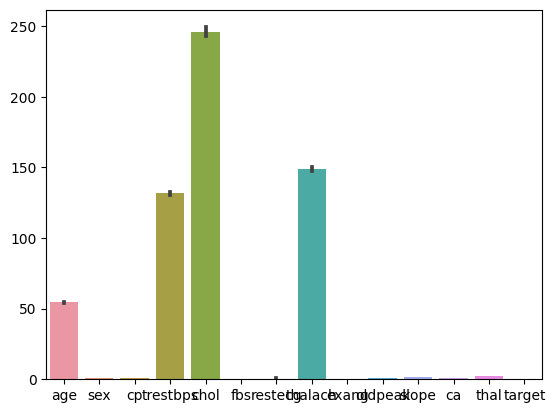

In [6]:
sns.barplot(data=heart)

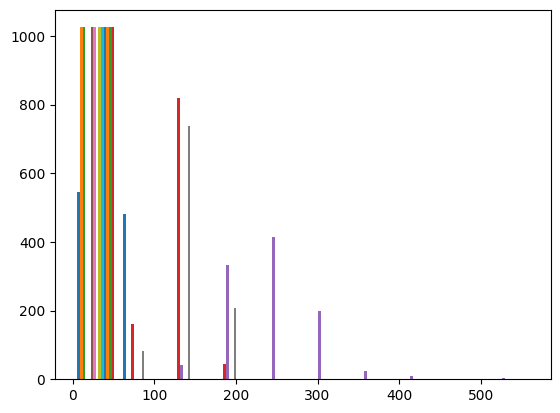

In [7]:
plt.hist(heart)
plt.show()

<AxesSubplot: xlabel='age', ylabel='trestbps'>

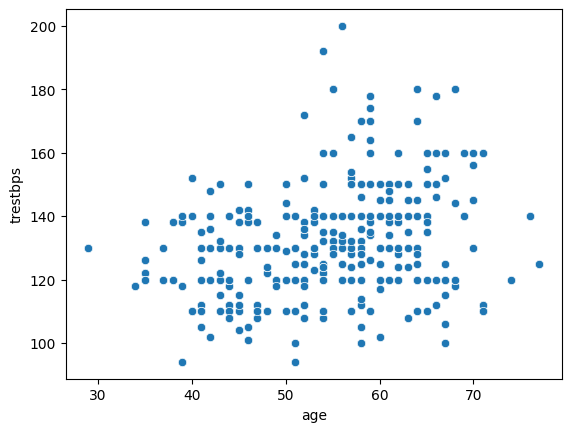

In [8]:
sns.scatterplot(data=heart, x='age', y='trestbps')

<AxesSubplot: xlabel='age', ylabel='chol'>

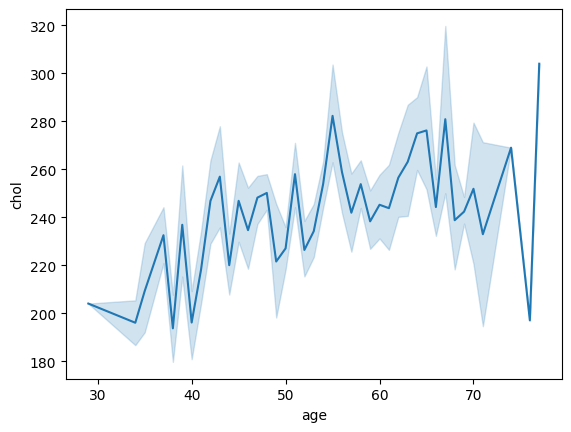

In [9]:
sns.lineplot(data=heart, x='age', y='chol')

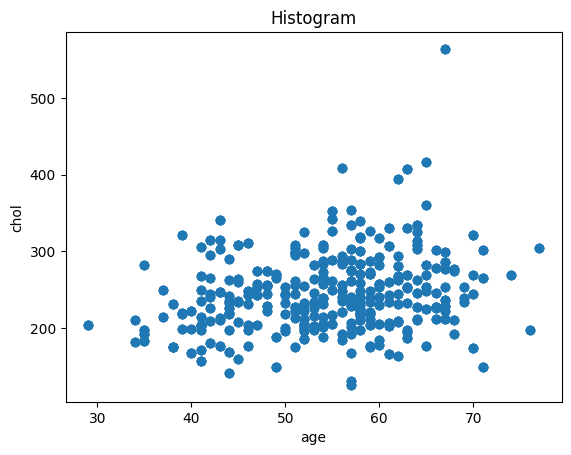

In [10]:
plt.scatter(heart['age'], heart['chol'])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Histogram')
plt.show()

<AxesSubplot: xlabel='age', ylabel='chol'>

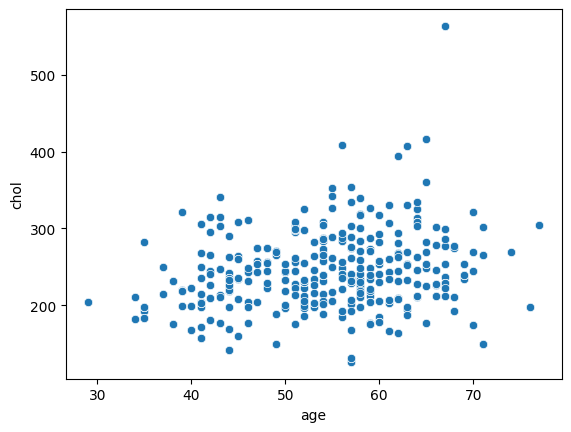

In [11]:
sns.scatterplot(data=heart, x='age', y='chol')

<AxesSubplot: >

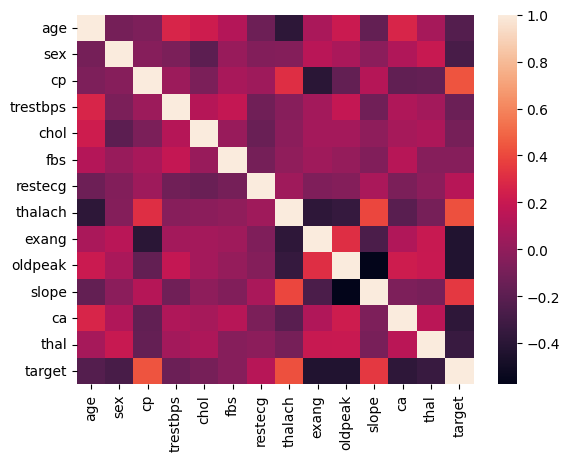

In [13]:
sns.heatmap(heart.corr())